In [9]:
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl
from multihist import Histdd

import flamedisx as fd

import os

# Templates from flamedisx

## Config : 

fiducial mass : 60t  
drift field : 240 V/cm  
gas field : 7.5 kV/cm  
elife : 10000e3  
g1 = 0.27  

In [10]:
pdfs = [dict(), dict()]

In [11]:
xlzd_source = fd.xlzd.XLZDERSource(configuration='60t')

cS1_min = xlzd_source.cS1_min
cS1_max = xlzd_source.cS1_max
log10_cS2_min = xlzd_source.log10_cS2_min
log10_cS2_max = xlzd_source.log10_cS2_max

/home/goldy/Documents/Stage_M1/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


In [12]:
conditions = 'good'
drift_field_V_cm = 240.
gas_field_kV_cm = 7.5
elife_ns = 10000e3
g1 = 0.27

# conditions = 'bad'
# drift_field_V_cm = 25.
# gas_field_kV_cm = 6.
# elife_ns = 10000e3
# g1 = 0.27

## For CEvNS :

In [13]:
CEvNS_Solar = fd.xlzd.XLZDvNRSolarSource(configuration='60t',
                                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                                  elife_ns=elife_ns, g1=g1)

/home/goldy/Documents/Stage_M1/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


Exepected number of events (per ton per year) : 1.6779543413146973


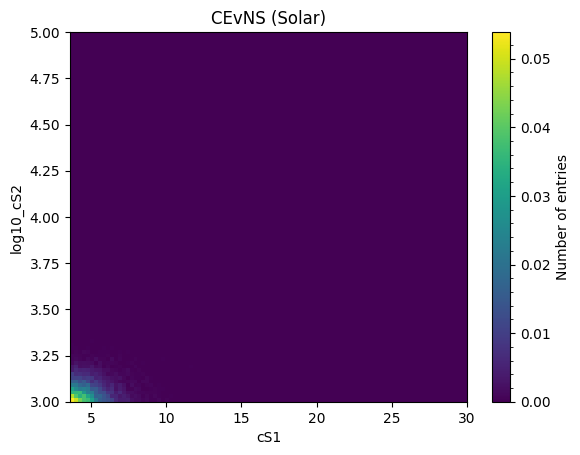

In [14]:
CEvNS_Solar_hist = Histdd(bins=100, range=[[cS1_min, 30], [3, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

CEvNS_Solar_data = CEvNS_Solar.simulate(int(1e7))

CEvNS_Solar_hist.add(CEvNS_Solar_data['cs1'], np.log10(CEvNS_Solar_data['cs2']))

CEvNS_Solar_mu = CEvNS_Solar.estimate_mu(n_trials=int(1e7))
CEvNS_Solar_hist.histogram = CEvNS_Solar_hist.histogram / CEvNS_Solar_hist.n * CEvNS_Solar_mu
print('Exepected number of events (per ton per year) : '+str(CEvNS_Solar_hist.n))

CEvNS_Solar_hist.plot()
plt.title(f'CEvNS (Solar)')

pdfs[1]['CEvNS_Solar'] = CEvNS_Solar_hist

## For Migdal :

In [15]:
Mig_Solar = fd.xlzd.XLZDvMigdalSolarSource(configuration='60t',
                                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                                  elife_ns=elife_ns, g1=g1)

/home/goldy/Documents/Stage_M1/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


Exepected number of events (per ton per year): 3.391437435150146e-06


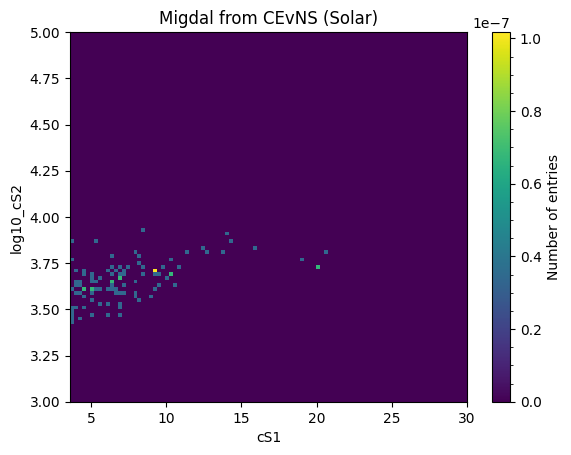

In [16]:
Mig_Solar_hist = Histdd(bins=100, range=[[cS1_min, 30], [3, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Mig_Solar_data = Mig_Solar.simulate(int(1e7))
Mig_Solar_hist.add(Mig_Solar_data['cs1'], np.log10(Mig_Solar_data['cs2']))
Mig_Solar_mu = Mig_Solar.estimate_mu(n_trials=int(1e7))
Mig_Solar_hist.histogram = Mig_Solar_hist.histogram / Mig_Solar_hist.n * Mig_Solar_mu
print('Exepected number of events (per ton per year): '+str(Mig_Solar_hist.n))
Mig_Solar_hist.plot()
plt.title(f'Migdal from CEvNS (Solar)')

pdfs[1]['Mig_Solar_LNGS'] = Mig_Solar_hist